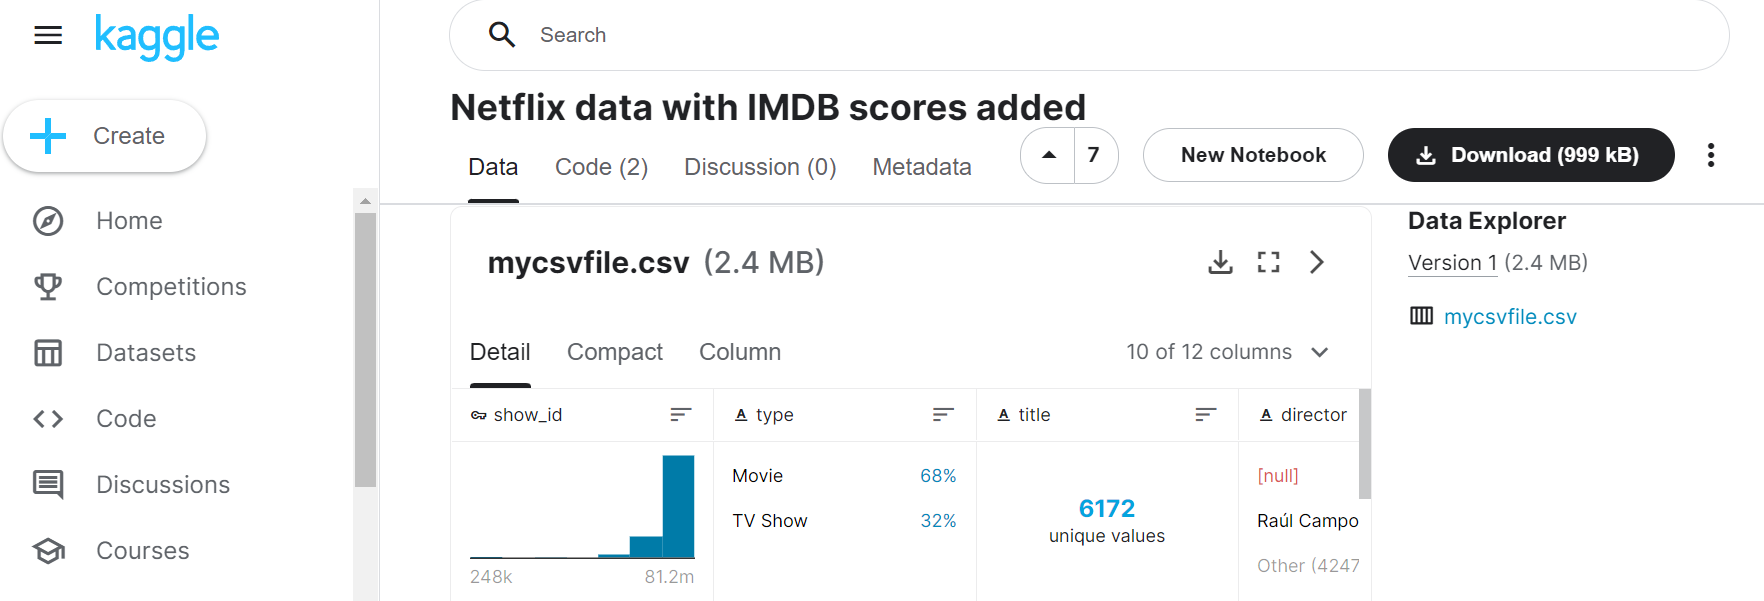

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv("mycsvfile.csv",header=0)
df_copy=df.copy()
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,5.2,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,8.2,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,6.4,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,5.7,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Text(0.5, 1.0, 'Type in Netflix with IMDB')

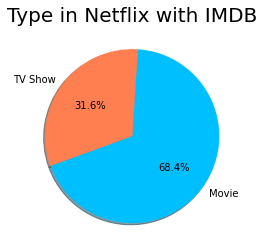

In [3]:
labels=list(df_copy["type"].unique())  #取固定值作為參數，並轉為list
sizes=list(df_copy.groupby("type")["show_id"].count())  #計算各類別總數後轉為list
colors=["deepskyblue","coral"]
explode=(0,0)

plt.pie(sizes,
       explode=explode,
       labels=labels,
       colors=colors,
       labeldistance=1.1,
       autopct="%2.1f%%",
       pctdistance=0.6,
       shadow=True,
       startangle=200)

plt.title("Type in Netflix with IMDB",fontsize=20)

In [4]:
df_copy['country']=df_copy.loc[df_copy["country"]!="none",["country"]]
countrylist = df_copy['country'].str.split(",",expand=True) #依逗號區隔，再依資料數新增一行
countrylist=countrylist.stack().str.strip()
countrylist=countrylist.dropna()
countrylist

0     0     United States
      1             India
      2       South Korea
      3             China
1     0    United Kingdom
                ...      
6227  0         Australia
6229  0     United States
6230  0     United States
6232  0    United Kingdom
6233  0     United States
Length: 7182, dtype: object

,0
United States,2610
India,838
United Kingdom,602
Canada,318
France,271
Japan,231
Spain,178
South Korea,162
Germany,151
Mexico,129


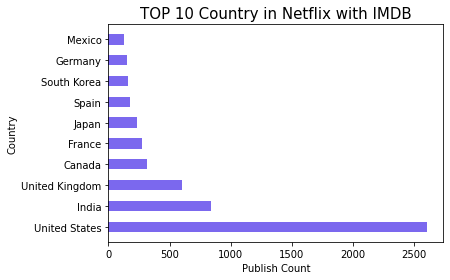

In [5]:
# x軸 前五名國家(使用head取出數量最多的前五個的index值=國家名)
labels=list(countrylist.value_counts().head(10).index)  

# y軸值 前五名國家出版次數
sizes=list(countrylist.value_counts().head(10))  

plt.barh(labels,sizes,color="mediumslateblue",height=0.5)

plt.tick_params(axis="both",labelsize=10,color="black")

plt.ylabel("Country",fontsize=10)#
plt.xlabel("Publish Count",fontsize=10)

plt.title("TOP 10 Country in Netflix with IMDB",fontsize=15)

pd.DataFrame(sizes,labels)  #產出一個DataFrame

In [6]:
df_copy.loc[df_copy["rating"]==0,["rating"]]=df_copy["rating"].mean()
df_copy["rating"]=df_copy["rating"].round(0)

#以評分表作為標的
df_rate=df_copy.groupby("rating") 

#再用影片類型依評分做分類計算，結果會是mutipleindex，unstack回一個Dataframe就可以直接視覺化
df_typerate=df_rate["type"].value_counts().unstack()  
df_typerate

type,Movie,TV Show
rating,,
2.0,9,1
3.0,34,8
4.0,193,28
5.0,449,71
6.0,1452,403
7.0,1282,456
8.0,793,842
9.0,49,157
10.0,4,3


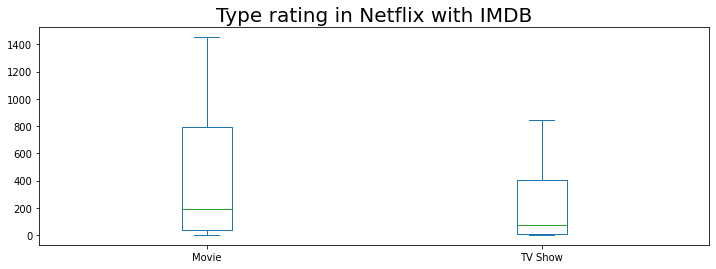

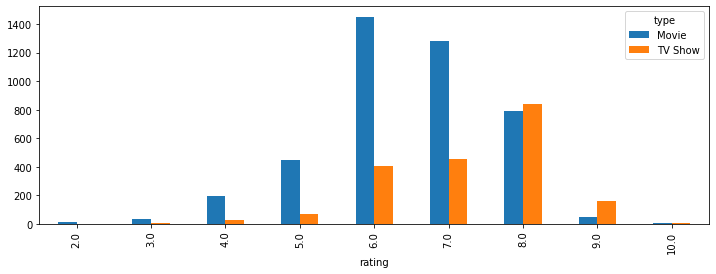

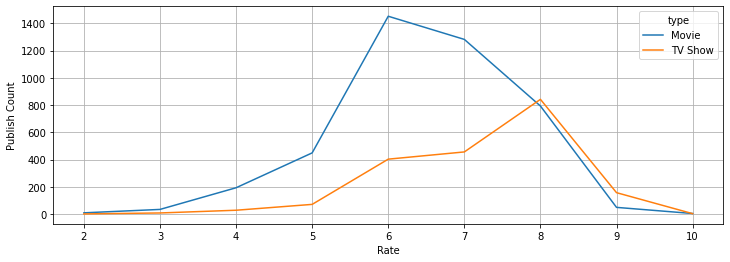

In [28]:
ratetype=df_copy.pivot_table(index="rating",columns="type",values="show_id",aggfunc="count")


ratetype.plot(kind="box",figsize=(12,4))
plt.title("Type rating in Netflix with IMDB",fontsize=20)
ratetype.plot(kind="bar",figsize=(12,4))
ratetype.plot(kind="line",figsize=(12,4))
plt.grid(True)


plt.xlabel("Rate",fontsize=10)#
plt.ylabel("Publish Count",fontsize=10)
ratetype

In [10]:
# listed_in 影片內容類型

listed_in=df_copy["listed_in"].str.split(",",expand=True)
listed_in=listed_in.stack().str.strip()
listed_in.value_counts().head()

International Movies      1927
Dramas                    1623
Comedies                  1113
International TV Shows    1001
Documentaries              668
dtype: int64

# 最多的十種影片內容類型(Listed_in)

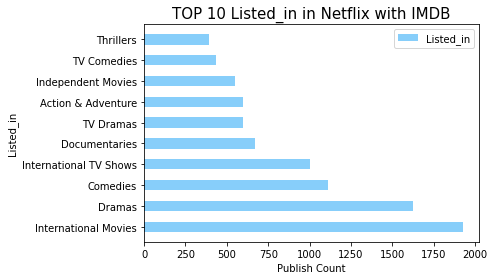

In [11]:
listedin=list(listed_in.value_counts().head(10).index)
sizes=list(listed_in.value_counts().head(10))

plt.barh(listedin,sizes,height=0.5,color="lightskyblue",label="Listed_in")

plt.ylabel("Listed_in",fontsize=10)#
plt.xlabel("Publish Count",fontsize=10)

plt.title("TOP 10 Listed_in in Netflix with IMDB",fontsize=15)

plt.legend()

,0
United States,2610
India,838
United Kingdom,602
Canada,318
France,271
Japan,231
Spain,178
South Korea,162
Germany,151
Mexico,129


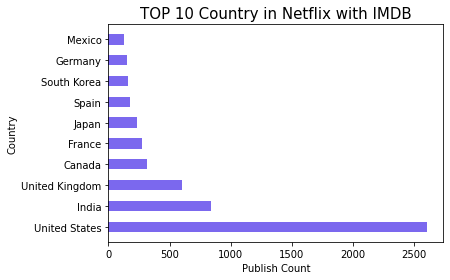

In [12]:
# x軸 前五名國家(使用head取出數量最多的前五個的index值=國家名)
labels=list(countrylist.value_counts().head(10).index)  

# y軸值 前五名國家出版次數
sizes=list(countrylist.value_counts().head(10))  

plt.barh(labels,sizes,color="mediumslateblue",height=0.5)

plt.tick_params(axis="both",labelsize=10,color="black")

plt.ylabel("Country",fontsize=10)
plt.xlabel("Publish Count",fontsize=10)

plt.title("TOP 10 Country in Netflix with IMDB",fontsize=15)

pd.DataFrame(sizes,labels)  #產出一個DataFrame

rating           
                       mean   max  min
type    release_year                  
Movie   2010            7.0   9.0  3.0
        2011            6.0   8.0  2.0
        2012            7.0   9.0  3.0
        2013            7.0   9.0  2.0
        2014            6.0   9.0  2.0
        2015            7.0   9.0  2.0
        2016            6.0  10.0  2.0
        2017            6.0  10.0  2.0
        2018            6.0  10.0  2.0
        2019            6.0  10.0  3.0
        2020            6.0   7.0  4.0
TV Show 2010            7.0   9.0  4.0
        2011            7.0   9.0  5.0
        2012            7.0   9.0  5.0
        2013            7.0   9.0  3.0
        2014            7.0   9.0  4.0
        2015            7.0   9.0  3.0
        2016            7.0   9.0  4.0
        2017            7.0   9.0  3.0
        2018            7.0  10.0  3.0
        2019            7.0   9.0  3.0
        2020            7.0   9.0  5.0

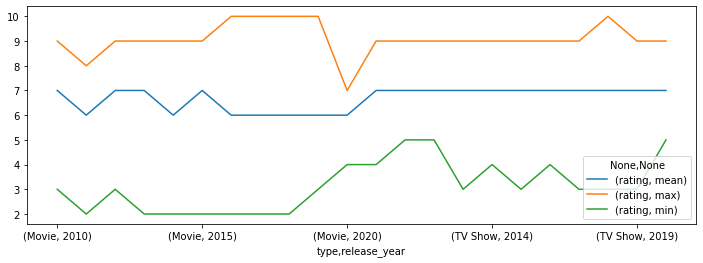

In [31]:
filt=df_copy["release_year"]>=2010
scorelist=df_copy[filt].groupby(["type","release_year"]).agg({"rating":["mean","max","min"]}).round(0)

scorelist.plot(kind="line",figsize=(12,4))
scorelist

type,Movie,TV Show
release_year,,
2001,30,4
2002,35,3
2003,35,8
2004,40,9
2005,51,12
2006,59,9
2007,60,11
2008,87,20
2009,87,34


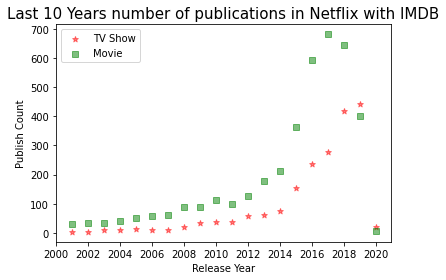

In [33]:
filt=df_copy["release_year"]>=2001
yeartype=df_copy[filt].pivot_table(index="release_year",columns="type",values="show_id",aggfunc="count")

yearlist=list(yeartype.index)
type1=list(yeartype["TV Show"])
type2=list(yeartype["Movie"])

plt.scatter(yearlist,type1,c="r",marker="*",alpha=0.5,label="TV Show")
plt.scatter(yearlist,type2,c="g",marker="s",alpha=0.5,label="Movie")

plt.xticks(range(2000,2022,2))
plt.xlabel("Release Year",fontsize=10)
plt.ylabel("Publish Count",fontsize=10)
plt.title("Last 10 Years number of publications in Netflix with IMDB",fontsize=15)

plt.legend()

yeartype.style.highlight_max()

Text(0, 0.5, 'Publish Count')

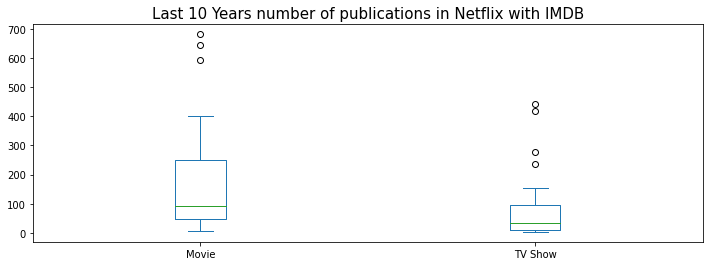

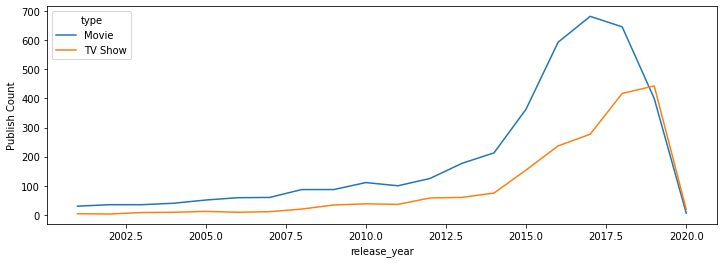

In [36]:
yeartype.plot(kind="box",figsize=(12,4))
plt.title("Last 10 Years number of publications in Netflix with IMDB",fontsize=15)
yeartype.plot(kind="line",figsize=(12,4))
plt.ylabel("Publish Count",fontsize=10)
